# Rayleigh Solver

## Rayleigh ratios plot

Before explaining the solver, just a quick sanity check with the ratios plot.

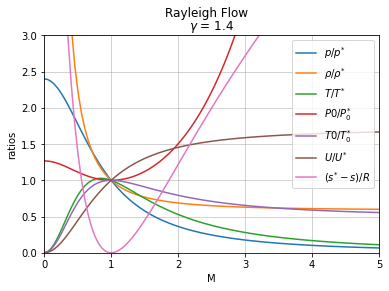

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygasflow import rayleigh_solver

gamma = 1.4
M = np.linspace(1e-05, 5, 100)
results = rayleigh_solver("m", M, gamma)

plt.plot(M, results[1], label=r"$p / p^{*}$")
plt.plot(M, results[2], label=r"$\rho / \rho^{*}$")
plt.plot(M, results[3], label=r"$T / T^{*}$")
plt.plot(M, results[4], label=r"$P0 / P_{0}^{*}$")
plt.plot(M, results[5], label=r"$T0 / T_{0}^{*}$")
plt.plot(M, results[6], label=r"$U / U^{*}$")
plt.plot(M, results[7], label=r"$(s^{*}-s)/R$")

plt.xlim(0, max(M))
plt.ylim(0, 3)
plt.xlabel("M")
plt.ylabel("ratios")
plt.grid(which='major', linestyle='-', alpha=0.7)
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.legend(loc='upper right')
plt.suptitle("Rayleigh Flow")
plt.title("$\gamma$ = " + str(gamma))
plt.show()

## Examples

This solver allows to quickly compute the Mach number, all the ratios and parameters (entropy paramater) by specifying what parameter we do know.

Let's read the solver's documentation:

In [2]:
help(rayleigh_solver)

Help on function rayleigh_solver in module pygasflow.solvers.rayleigh:

rayleigh_solver(param_name, param_value, gamma=1.4, to_dict=False)
    Compute all Rayleigh ratios and Mach number given an input parameter.
    
    Parameters
    ----------
    param_name : string
        Name of the parameter given in input. Can be either one of:
    
        * ``'m'``: Mach number
        * ``'pressure'``: Critical Pressure Ratio P/P*
        * ``'density'``: Critical Density Ratio rho/rho*
        * ``'velocity'``: Critical Velocity Ratio U/U*.
        * ``'temperature_sub'``: Critical Temperature Ratio T/T for
          subsonic case.
        * ``'temperature_super'``: Critical Temperature Ratio T/T* for
          supersonic case.
        * ``'total_pressure_sub'``: Critical Total Pressure Ratio P0/P0*
          for subsonic case.
        * ``'total_pressure_super'``: Critical Total Pressure Ratio P0/P0*
          for supersonic case.
        * ``'total_temperature_sub'``: Critical Total Tem

This is just a pretty print function...

In [3]:
def print_rayleigh(M, prs, drs, trs, tprs, ttrs, urs, eps):
    print("M \t\t {}".format(M))
    print("P/P* \t\t {}".format(prs))
    print("rho/rho* \t {}".format(drs))
    print("T/T* \t\t {}".format(trs))
    print("P0/P0* \t\t {}".format(tprs))
    print("T0/T0* \t\t {}".format(ttrs))
    print("U/U* \t\t {}".format(urs))
    print("(s*-s)/R \t {}".format(eps))
    print()

In [4]:
result = rayleigh_solver('m', 2)
print_rayleigh(*result)

M 		 2.0
P/P* 		 0.36363636363636365
rho/rho* 	 0.6875
T/T* 		 0.5289256198347108
P0/P0* 		 1.5030959785260414
T0/T0* 		 0.793388429752066
U/U* 		 1.4545454545454546
(s*-s)/R 	 1.2175752061512626



In [5]:
r1 = rayleigh_solver('pressure', 0.36363636363636365)
r2 = rayleigh_solver('density', 0.6875)
r3 = rayleigh_solver('temperature_super', 0.5289256198347108)
r4 = rayleigh_solver('total_pressure_super', 1.5030959785260414)
r5 = rayleigh_solver('total_temperature_super', 0.793388429752066)
r6 = rayleigh_solver('velocity', 1.4545454545454546)
r7 = rayleigh_solver('entropy_super', 1.2175752061512626)
print_rayleigh(*r1)
print_rayleigh(*r2)
print_rayleigh(*r3)
print_rayleigh(*r4)
print_rayleigh(*r5)
print_rayleigh(*r6)
print_rayleigh(*r7)

M 		 2.0
P/P* 		 0.36363636363636365
rho/rho* 	 0.6875
T/T* 		 0.5289256198347108
P0/P0* 		 1.5030959785260414
T0/T0* 		 0.793388429752066
U/U* 		 1.4545454545454546
(s*-s)/R 	 1.2175752061512626

M 		 2.0
P/P* 		 0.36363636363636365
rho/rho* 	 0.6875
T/T* 		 0.5289256198347108
P0/P0* 		 1.5030959785260414
T0/T0* 		 0.793388429752066
U/U* 		 1.4545454545454546
(s*-s)/R 	 1.2175752061512626

M 		 2.0000000000000004
P/P* 		 0.3636363636363635
rho/rho* 	 0.6875
T/T* 		 0.5289256198347106
P0/P0* 		 1.5030959785260414
T0/T0* 		 0.7933884297520659
U/U* 		 1.4545454545454546
(s*-s)/R 	 1.2175752061512637

M 		 1.9999999999986215
P/P* 		 0.3636363636367889
rho/rho* 	 0.6875000000001437
T/T* 		 0.5289256198352189
P0/P0* 		 1.5030959785245759
T0/T0* 		 0.7933884297523423
U/U* 		 1.4545454545451506
(s*-s)/R 	 1.2175752061490703

M 		 2.0
P/P* 		 0.36363636363636365
rho/rho* 	 0.6875
T/T* 		 0.5289256198347108
P0/P0* 		 1.5030959785260414
T0/T0* 		 0.793388429752066
U/U* 		 1.4545454545454546
(s*-

Should you wish to solve for more than one Mach number of ratio at the same time, you can do:

In [6]:
result = rayleigh_solver('m', [0.5, 1, 2, 4])
print_rayleigh(*result)

M 		 [0.5 1.  2.  4. ]
P/P* 		 [1.77777778 1.         0.36363636 0.1025641 ]
rho/rho* 	 [2.25     1.       0.6875   0.609375]
T/T* 		 [0.79012346 1.         0.52892562 0.16831032]
P0/P0* 		 [1.1140525  1.         1.50309598 8.22684925]
T0/T0* 		 [0.69135802 1.         0.79338843 0.58908613]
U/U* 		 [0.44444444 1.         1.45454545 1.64102564]
(s*-s)/R 	 [ 1.39984539 -0.          1.21757521  3.95954318]



We can do the same with different parameters, but we must be carefoul. In the following example, we ask the solver to solve for the supersonic case, given the entropy ratios computed just above:

In [7]:
result = rayleigh_solver('entropy_super', [1.39984539, -0., 1.21757521, 3.95954318])
print_rayleigh(*result)

M 		 [2.1148006 1.        2.        4.       ]
P/P* 		 [0.33051777 1.         0.36363636 0.1025641 ]
rho/rho* 	 [0.67649772 1.         0.6875     0.609375  ]
T/T* 		 [0.4885719  1.         0.52892562 0.16831032]
P0/P0* 		 [1.63407725 1.         1.50309598 8.22684924]
T0/T0* 		 [0.77132324 1.         0.79338843 0.58908613]
U/U* 		 [1.47820159 1.         1.45454546 1.64102564]
(s*-s)/R 	 [ 1.39984539 -0.          1.21757521  3.95954318]



Therefore, it is not a surprise that the Mach number for the $\frac{s^{*} - s}{R} = 1.39984539$ is $M = 2.1148006$.

This holds true for every parameter that does have distinct formulation for subsonic and supersonic case.

In [8]:
result = rayleigh_solver('temperature_super', [0.79012346, 1., 0.52892562, 0.16831032])
print_rayleigh(*result)

M 		 [1.42857142 1.         2.         4.00000003]
P/P* 		 [0.62222223 1.         0.36363636 0.1025641 ]
rho/rho* 	 [0.7875   1.       0.6875   0.609375]
T/T* 		 [0.79012346 1.         0.52892562 0.16831032]
P0/P0* 		 [1.08917256 1.         1.50309598 8.22684945]
T0/T0* 		 [0.92718569 1.         0.79338843 0.58908613]
U/U* 		 [1.26984127 1.         1.45454545 1.64102564]
(s*-s)/R 	 [ 0.35002326 -0.          1.21757521  3.95954321]

